In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import folium
import time
from IPython.display import display
%matplotlib inline
matplotlib.style.use('ggplot')

/Users/XueqiWang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Sunday:


/Users/XueqiWang/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


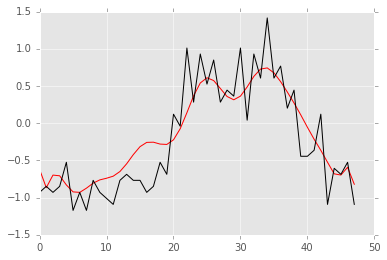

Sundaytest loss:			0.117339932555
Monday:


/Users/XueqiWang/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


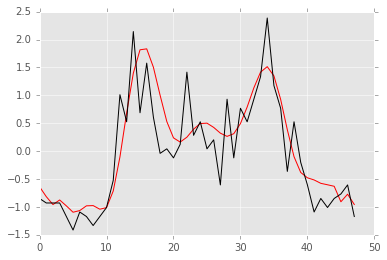

Mondaytest loss:			0.243365379895
Tuesday:


/Users/XueqiWang/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


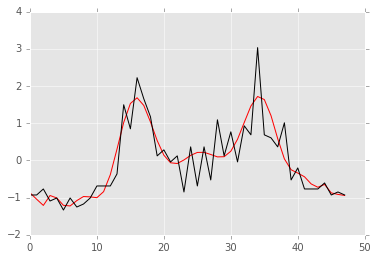

Tuesdaytest loss:			0.225764012624
Wednesday:


/Users/XueqiWang/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


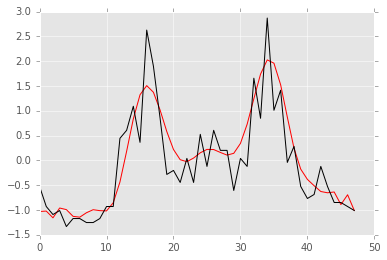

Wednesdaytest loss:			0.235561635359
Thursday:


/Users/XueqiWang/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


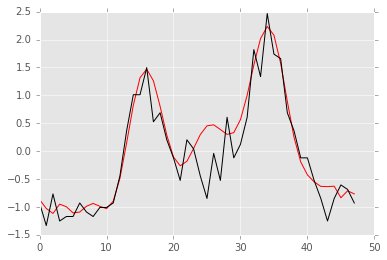

Thursdaytest loss:			0.14181680426
Friday:


/Users/XueqiWang/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


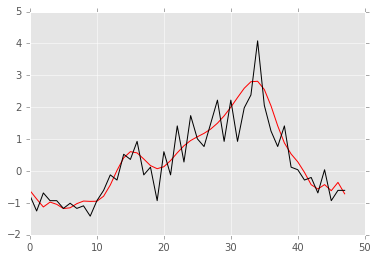

Fridaytest loss:			0.252774563402
Santurday:


/Users/XueqiWang/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


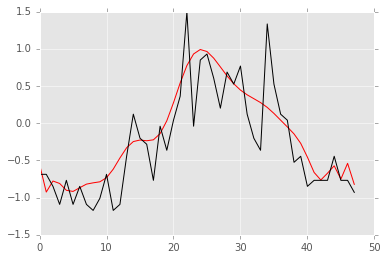

Santurdaytest loss:			0.134568341101
Average error on all weekday:			0.193027238456


In [5]:
olddata = np.load('data4/num_accident_OH_norm_2009-2015.npy')
week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Santurday']
models = []
total_loss = np.zeros(7)
start = 0
for wd in range(7):
    # Abstract each weekday data
    print (week[wd] + ':')
    newdata = np.zeros(shape = (336,2))
    i = start
    j = 0
    while j<7:
        newdata[j*48:j*48+48, :] = olddata[i:i+48, -2:]
        j+=1
        i+=336
    npdata = newdata
    x = npdata[0:288, 0]
    y = npdata[0:288, 1]
    z = np.polyfit(x, y, 25)
    fitline = np.poly1d(z)
    models.append(fitline)
    
    plt.figure()
    plt.plot(fitline(npdata[288:336, 0]), color = 'r')
    plt.plot(npdata[288:336, -1], color = 'k')
    plt.show()
    # compute test loss
    pre = fitline(npdata[288:336, 0])
    ob = npdata[288:336, -1]
    test_err = (pre - ob)**2
    test_err = np.mean(test_err)
    print ('{}test loss:\t\t\t{}'.format(week[wd], test_err))
    total_loss[wd] = test_err
    start += 48

print ('Average error on all weekday:\t\t\t{}'.format(total_loss.mean()))